In [1]:
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

<hr>

## Get the data

In [2]:
donations = pd.read_csv('../../data/processed_donations.csv')
donations.head()

,id,created_at,amount,year,month,day,hour,minute,second,time_of_the_day,season,category
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.00,2013,12,17,21,47,14,evening,winter,4
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.00,2016,2,2,18,34,27,evening,winter,5
2,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,10.00,2016,10,25,20,15,11,evening,fall,3
3,00002d44003ed46b066607c5455a999a,2017-01-16 01:11:20,15.51,2017,1,16,1,11,20,morning,winter,3
4,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,100.00,2017,1,16,14,20,10,midday,winter,5


In [3]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687884 entries, 0 to 4687883
Data columns (total 12 columns):
id                 object
created_at         object
amount             float64
year               int64
month              int64
day                int64
hour               int64
minute             int64
second             int64
time_of_the_day    object
season             object
category           int64
dtypes: float64(1), int64(7), object(4)
memory usage: 429.2+ MB


### Convert time column, and access groups by year

In [4]:
donations['created_at'] = pd.to_datetime(donations['created_at'])

yearly_group = donations.groupby(donations.created_at.dt.year)
yearly_group.get_group(2013)

,id,created_at,amount,year,month,day,hour,minute,second,time_of_the_day,season,category
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.0,2013,12,17,21,47,14,evening,winter,4
25,00005f52c98eeaf92b2414a352b023a4,2013-09-19 13:58:55,10.0,2013,9,19,13,58,55,midday,fall,3
47,0000889adf4cc958a35daee1f2529b48,2013-08-22 19:48:30,10.0,2013,8,22,19,48,30,evening,summer,3
51,0000a2175753bc165e53c408589a3bd6,2013-12-02 14:38:28,25.0,2013,12,2,14,38,28,midday,winter,4
65,0000c14308c4cb9259a4fe51f692c9ef,2013-04-19 10:12:17,25.0,2013,4,19,10,12,17,morning,spring,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4687841,fffed4187f3b5f17cb58536f7fac8dee,2013-11-20 14:23:08,10.0,2013,11,20,14,23,8,midday,fall,3
4687842,fffed4187f3b5f17cb58536f7fac8dee,2013-11-20 14:23:09,11.0,2013,11,20,14,23,9,midday,fall,3
4687843,fffed4187f3b5f17cb58536f7fac8dee,2013-12-08 20:40:46,1.0,2013,12,8,20,40,46,evening,winter,1
4687844,fffed4187f3b5f17cb58536f7fac8dee,2013-12-08 21:40:03,5.0,2013,12,8,21,40,3,evening,winter,2


<hr>

## Plot overall count of donations for a given year

In [5]:
donations_2013 = yearly_group.get_group(2013)

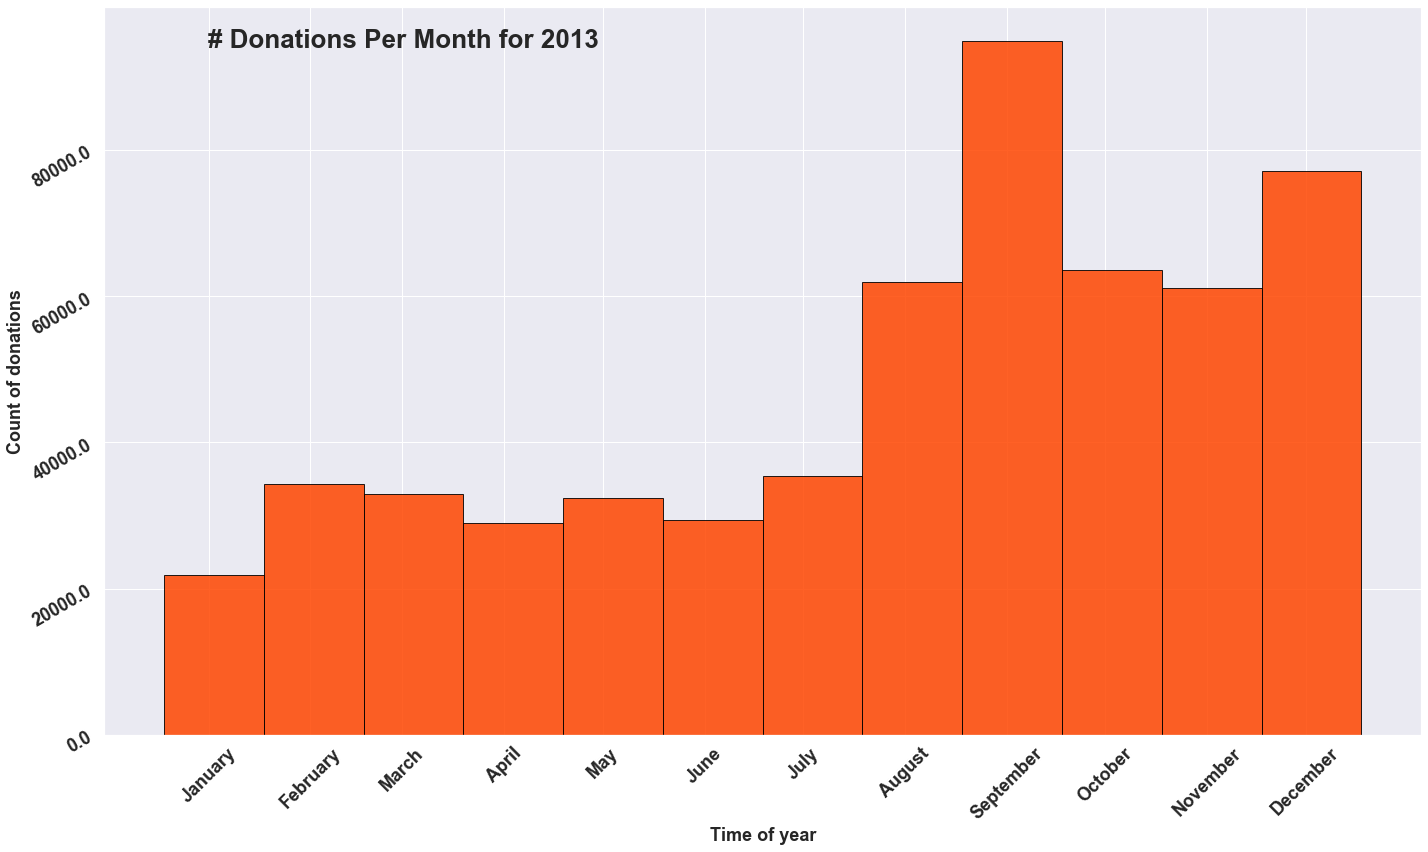

In [10]:
##############################################
## SEABORN STYLING
##############################################
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)


##############################################
## DATA
##############################################
donations_2013 = yearly_group.get_group(2013)


##############################################
## LAYOUT / FIGURE / AXIS
##############################################
f, ax = plt.subplots(1, 1, figsize=(20, 12))
font_props = {'fontweight': 'bold', 'fontsize': 18}


##############################################
## TITLE
##############################################
f.suptitle(
    '# Donations Per Month for 2013', 
    fontsize=26, 
    fontweight='bold', 
    horizontalalignment='right',
    x=0.42,
    y=0.96)


##############################################
## PLOT THE DATA
##############################################
ax.hist(
    donations_2013.created_at, 
    bins=12, 
    color='orangered', 
    histtype='bar', 
    ec='black', 
    alpha=0.85)


##############################################
## UPDATE THE (XY)LABELS
##############################################
ax.set_xlabel('Time of year', fontdict=font_props)
ax.set_ylabel('Count of donations', fontdict=font_props)


##############################################
## UPDATE THE (XY)TICKLABELS
##############################################
# For the x ticks, you need to specify the same type that the current data is in.
# right now, the x data represents dates for 2013, so we should specify a list of dates
# with their labels.



tick_positions = [datetime(2013, x, 15) for x in range(1, 13)]
tick_labels = [pos.strftime('%B') for pos in tick_positions]

# plt.xticks(tick_positions, tick_labels, fontsize=12, rotation=45)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontdict=font_props, rotation=45)

# # if you just want to update the properties of a pre-existing tick style.. 
# # you can access the property with `<ax>.get_yticks()`
ax.set_yticklabels(ax.get_yticks(), fontdict=font_props, rotation=30)


##############################################
## FINAL LAYOUT
##############################################
f.tight_layout();